### Joint feature selection with multi-task Lasso

The multi-task lasso allows to fit multiple regression problems jointly enforcing the selected features to be the same across tasks. This example simulates sequential measurements, each task is a time instant, and the revelant features vary in amplitude over time while being the same. The multi-task lasso imposes that features that are selected at one time point are select for all time point. This makes feature selection by the Lasso more stable.

The following figure compares the location of the non-zeros in W obtained with a simple Lasso or a MultiTaskLasso. The Lasso estimates yields scattered non-zeros while the non-zeros of the MultiTaskLasso are full columns.

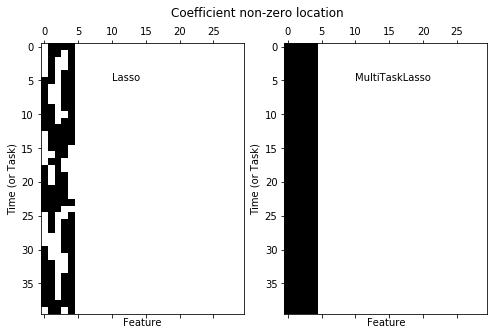

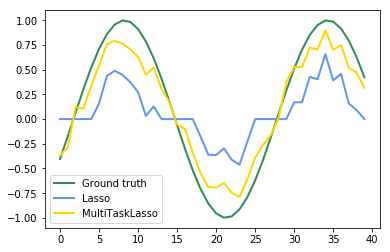

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.linear_model import Lasso, MultiTaskLasso

rng = np.random.RandomState(42)

# generate some 2D coefficients with sine waves with random frequency and phase
n_samples, n_features, n_tasks = 100, 30, 40
n_revelant_features = 5
coef = np.zeros((n_tasks, n_features))
times = np.linspace(0, 2 * np.pi, n_tasks)
for k in range(n_revelant_features):
    coef[:, k] = np.sin((1. + rng.randn(1)) * times + 3 * rng.randn(1))


X = rng.randn(n_samples, n_features)
Y = np.dot(X, coef.T) + rng.randn(n_samples, n_tasks)

coef_lasso = np.array([Lasso(alpha=.5).fit(X, y).coef_ for y in Y.T])
coef_multi_task_lasso = MultiTaskLasso(alpha=1.).fit(X, Y).coef_

# plot support and time series
fig = plt.figure(figsize=(8, 5))
plt.subplot(121)
plt.spy(coef_lasso)
plt.xlabel('Feature')
plt.ylabel('Time (or Task)')
plt.text(10, 5, 'Lasso')
plt.subplot(122)
plt.spy(coef_multi_task_lasso)
plt.xlabel('Feature')
plt.ylabel('Time (or Task)')
plt.text(10, 5, 'MultiTaskLasso')
fig.suptitle('Coefficient non-zero location')

feature_to_plot = 0
plt.figure()
plt.plot(coef[:, feature_to_plot], color='seagreen', linewidth=2,
         label='Ground truth')
plt.plot(coef_lasso[:, feature_to_plot], color='cornflowerblue', linewidth=2,
         label='Lasso')
plt.plot(coef_multi_task_lasso[:, feature_to_plot], color='gold', linewidth=2,
         label='MultiTaskLasso')
plt.legend()
plt.axis('tight')
plt.ylim([-1.1, 1.1])
plt.show()
